In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/alldata_1_for_kaggle.csv', encoding="latin-1")
df.head(3)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [2]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.rename({'0': 'target', 'a': 'feature'}, axis = 1)
df.head(3)

,target,feature
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [3]:
label_mapping = {'Thyroid_Cancer' : 0, 'Colon_Cancer': 1, 'Lung_Cancer': 2}
df['target'] = df['target'].replace(label_mapping)
df.head(3)

,target,feature
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...


In [4]:
"""
Now we do Data Preprocessing.
"""
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

regexp = RegexpTokenizer("[\w']+")

def convert_to_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return text.strip()
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") 
    return text.translate(str.maketrans("", "", punct_str))
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
def remove_http(text):
    http = "https?://\S+|www\.\S+" 
    pattern = r"({})".format(http) 
    return re.sub(pattern, "", text)
# Stopwords
stops = stopwords.words("english") 
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] 
allstops = stops + addstops
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [5]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) 
    text = re.sub('\[.*?\]', '', text) 
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    return text

In [6]:
df['feature'] = df['feature'].apply(text_normalizer)

In [7]:
df['feature'][0]

'thyroid surgery children single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim university buraidah al qassim saudi arabia bdepartment surgery king faisal specialist hospital research center riyadh saudi arabia cdepartment medicine king faisal specialist hospital research center riyadh saudi arabia correspondence dr osama ibrahim almosallam department surgery college medicine qassim university po box buraidah al qassim saudi arabia osamaiaahotmailcom orcid citation almosallam oi aseeri alhumaid alzahrani alsobhi alshanafey thyroid surgery children single institution ann saudi med received january accepted may published august copyright copyright annals saudi medicine saudi arabia access creative commons attributionnoncommercialnoderivatives international license cc byncnd details accessed httpcreativecommons nonebackground data thyroid surgery children scarceobjective analyz

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [9]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
X = list(df['feature'])
y = list(df['target'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

Error: Canceled future for execute_request message before replies were done

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
len(X_train),len(X_val)

(6056, 1514)

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
train_dataset[5]

{'input_ids': tensor([  101,  2458,  3647,  4621,  7065,  2545,  7028,  2512, 16368, 21781,
          2140, 24528, 28687,  4118,  2273,  2038, 11306,  2078,  7552,  3947,
          2627,  5109,  2174,  2750,  3278,  5082,  3449, 14194,  8524,  3436,
          3853, 11253,  3145,  8171,  2920, 14627,  4824,  3287, 15124, 16127,
          3132, 12958,  2378, 14192,  3370,  9165,  5228, 15124, 14095, 24528,
         28687,  7889,  2521,  2584, 20464,  5498,  9289,  7012,  5083,  4031,
          2458,  8720,  3117, 15124, 22069,  5051,  6895,  8873,  2278,  9165,
         19738,  4667,  9280,  4319,  3654,  3468,  5250,  7889, 23934,  6072,
         11314,  2015,  2817,  7818,  3025,  2309,  8153,  2309,  2427,  2913,
         22380,  4106,  7271, 12462, 11733,  3468,  2529,  8000, 12987,  3366,
          4160,  2951, 13462,  2015,  3005,  3988,  2405,  3800,  4208, 12151,
          9067,  2063, 15124, 22069,  5051,  6895,  8873,  2278,  7889,  2036,
         13265,  4106,  3176,  4397,  3

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average= 'weighted')
    precision = precision_score(y_true=labels, y_pred=pred, average='weighted')
    f1 = f1_score(y_true=labels, y_pred=pred, average='weighted')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=1,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
import matplotlib.pyplot as plt 
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(args.num_train_epochs):
    trainer.train()
    
    # Calculate training loss and accuracy
    train_results = trainer.evaluate()
    train_loss = train_results["eval_loss"]
    
    # Calculate validation loss and accuracy
    eval_results = trainer.evaluate()
    val_loss = eval_results["eval_loss"]
    val_accuracy = eval_results["eval_accuracy"]
    
    # Append the metrics to the lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # Print epoch-wise metrics
    print(f"Epoch {epoch + 1}:")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

  0%|          | 0/757 [00:00<?, ?it/s]

{'loss': 0.5663, 'learning_rate': 1.6974900924702774e-05, 'epoch': 0.66}
{'train_runtime': 2659.0932, 'train_samples_per_second': 2.277, 'train_steps_per_second': 0.285, 'train_loss': 0.4569685569370124, 'epoch': 1.0}


  0%|          | 0/190 [00:00<?, ?it/s]

<class 'transformers.trainer_utils.EvalPrediction'>


  0%|          | 0/190 [00:00<?, ?it/s]

<class 'transformers.trainer_utils.EvalPrediction'>
Epoch 1:
  Train Loss: 0.1669
  Validation Loss: 0.1669, Validation Accuracy: 0.9544


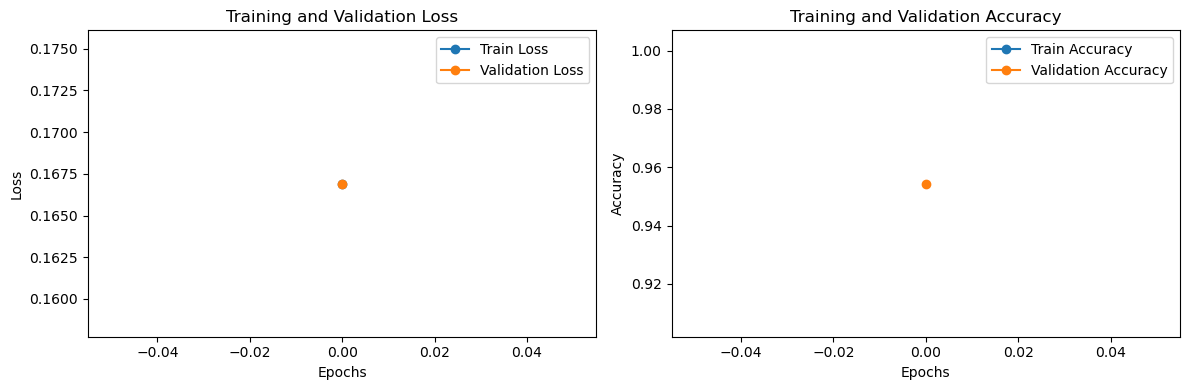

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
trainer.evaluate()

  0%|          | 0/190 [00:00<?, ?it/s]

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.16691716015338898,
 'eval_accuracy': 0.9544253632760898,
 'eval_precision': 0.9567554194754972,
 'eval_recall': 0.9544253632760898,
 'eval_f1': 0.9544271280886313,
 'eval_runtime': 174.2657,
 'eval_samples_per_second': 8.688,
 'eval_steps_per_second': 1.09,
 'epoch': 1.0}